<a href="https://colab.research.google.com/github/Festuskipkoech/Festus_data-science/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#ML | Credit Card Fraud Detection

###Main challenges involved in credit card fraud detection are:

Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.
Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
Data availability as the data is mostly private.
Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.
Adaptive techniques used against the model by the scammers.

###How to tackle these challenges?
The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
Imbalance can be dealt with by properly using some methods which we will talk about in the next paragraph
For protecting the privacy of the user the dimensionality of the data can be reduced.
A more trustworthy source must be taken which double-check the data, at least for training the model.
We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [ ]:
# Load dataset
data=pd.read_csv('/content/creditcard.csv')


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:

(data.shape)
(data.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,...,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000
mean,29408.888120,-0.244221,0.003887,0.691974,0.183611,-0.259039,0.104715,-0.120474,0.054468,0.108449,...,-0.028862,-0.106634,-0.039418,0.007995,0.135556,0.020305,0.004140,0.003987,94.014363,0.002908
std,13196.047307,1.887998,1.641193,1.498371,1.398830,1.413486,1.312673,1.278442,1.216566,1.208872,...,0.732046,0.636907,0.592622,0.595768,0.438858,0.500884,0.389621,0.332373,253.518524,0.053844
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,22655.500000,-0.993823,-0.570329,0.215237,-0.723584,-0.871680,-0.634868,-0.606774,-0.146407,-0.622868,...,-0.230767,-0.528352,-0.178719,-0.322127,-0.128074,-0.330665,-0.063502,-0.006740,7.680000,0.000000
50%,33767.000000,-0.246892,0.075692,0.793662,0.190588,-0.290140,-0.150447,-0.077622,0.059086,-0.000482,...,-0.067054,-0.081866,-0.051550,0.062606,0.174933,-0.072844,0.008875,0.022241,25.345000,0.000000
75%,39498.000000,1.154831,0.731302,1.429386,1.066994,0.282184,0.495847,0.424977,0.333436,0.800723,...,0.108996,0.307826,0.078873,0.401672,0.421984,0.299365,0.083277,0.076230,86.160000,0.000000
max,45026.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51590 non-null  float64
 12  V12     51590 non-null  float64
 13  V13     51590 non-null  float64
 14  V14     51590 non-null  float64
 15  V15     51590 non-null  float64
 16  V16     51590 non-null  float64
 17  V17     51590 non-null  float64
 18  V18     51590 non-null  float64
 19  V19     51590 non-null  float64
 20  V20     51590 non-null  float64
 21  V21     51590 non-null  float64
 22

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.00291601866251944
Fraud Cases: 150
Valid Transactions: 51440


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,150.000000
mean,98.848400
std,232.056904
min,0.000000
25%,1.000000
50%,8.370000
75%,99.990000
max,1809.680000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,51440.000000
mean,94.000267
std,253.580381
min,0.000000
25%,7.680000
50%,25.390000
75%,86.002500
max,12910.930000


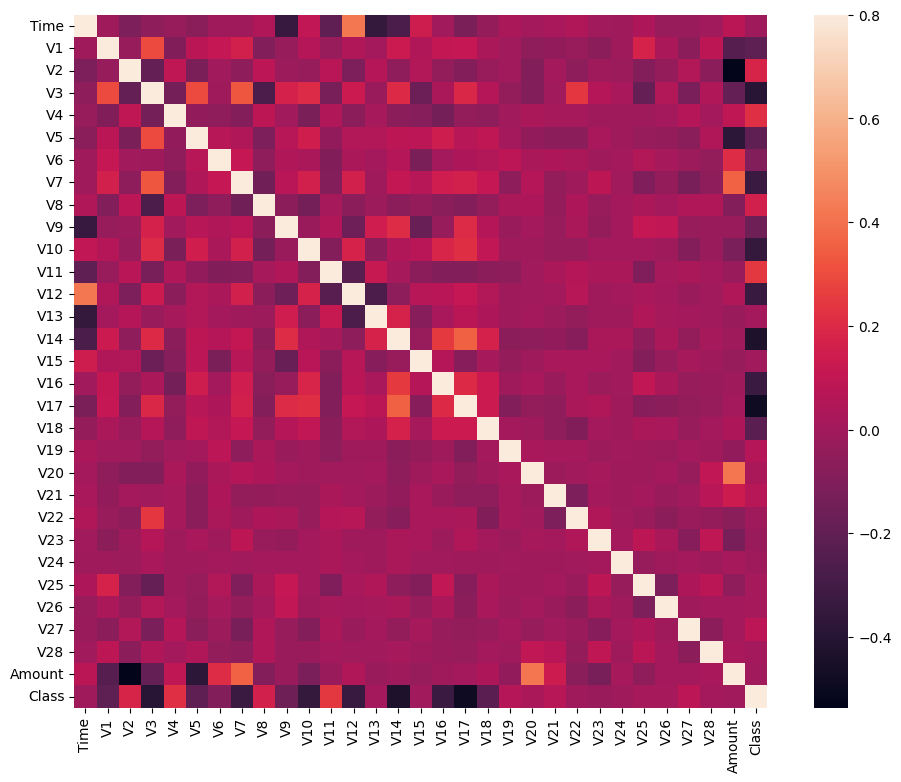

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(51591, 30)
(51591,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


ValueError: Input y contains NaN.

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
